In [11]:
print("""
@File         : 3-customizing_visualizations.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 17:26:33
@Email        : cuixuanstephen@gmail.com
@Description  : Customizing visualizations
""")


@File         : 3-customizing_visualizations.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 17:26:33
@Email        : cuixuanstephen@gmail.com
@Description  : Customizing visualizations



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv',
    index_col='date', parse_dates=True
)

quakes = pd.read_csv("data/earthquakes.csv")

#### Adding reference lines

In [13]:
from stock_analysis import StockAnalyzer

fb_analyzer = StockAnalyzer(fb)
support, resistance = (
    getattr(fb_analyzer, stat)(level=3)
    for stat in ['support', 'resistance']
)

support, resistance

(np.float64(124.4566666666667), np.float64(138.5266666666667))

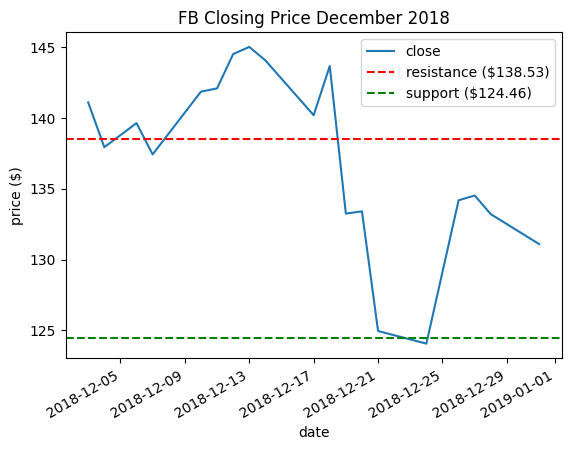

In [14]:
fb['close']['2018-12'].plot(title='FB Closing Price December 2018')

plt.axhline(
    y=resistance, color='r', linestyle='--',
    label=f'resistance (${resistance:,.2f})'
)
plt.axhline(
    y=support, color='g', linestyle='--',
    label=f'support (${support:,.2f})'
)

plt.ylabel("price ($)")
plt.legend()

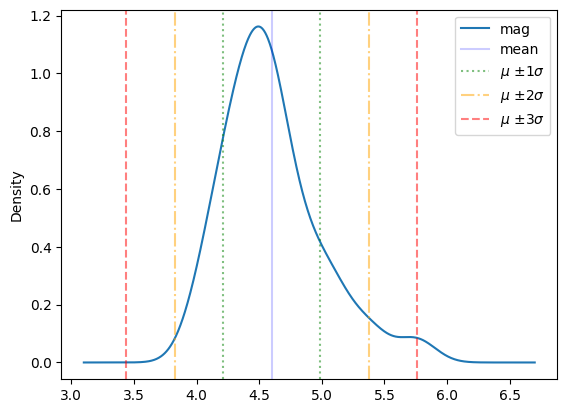

In [15]:
from viz import std_from_mean_kde

ax = std_from_mean_kde(
    quakes.query("magType == 'mb' and parsed_place == 'Indonesia'")["mag"],
)

#### Shading regions

Text(0, 0.5, 'Price ($)')

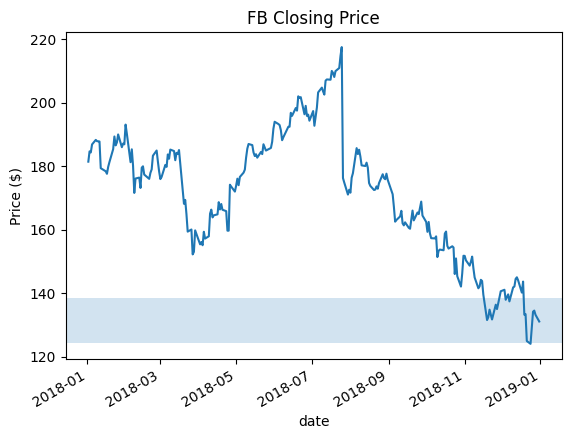

In [16]:
ax = fb['close'].plot(title="FB Closing Price")
ax.axhspan(support, resistance, alpha=.2)
plt.ylabel("Price ($)")

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

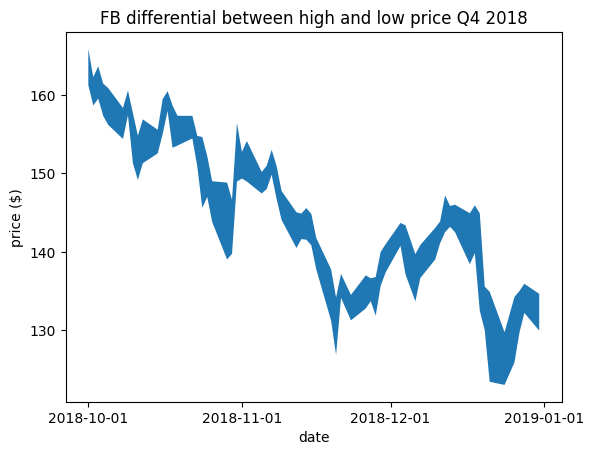

In [17]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4['high'], fb_q4["low"])
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])

plt.xlabel("date")
plt.ylabel("price ($)")
plt.title('FB differential between high and low price Q4 2018')

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

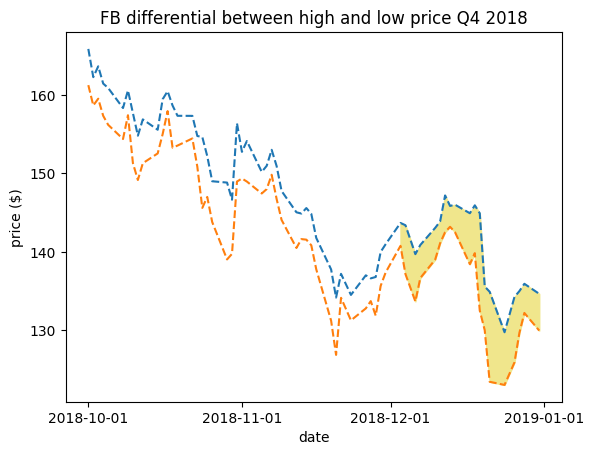

In [18]:
plt.fill_between(fb_q4.index, fb_q4['high'], fb_q4["low"],
                 where=fb_q4.index.month == 12, color='khaki', label='December differential')

plt.plot(fb_q4.index, fb_q4['high'], '--', label="daily high")
plt.plot(fb_q4.index, fb_q4['low'], '--', label="daily low")
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])

plt.xlabel("date")
plt.ylabel("price ($)")
plt.title('FB differential between high and low price Q4 2018')

#### Annotations

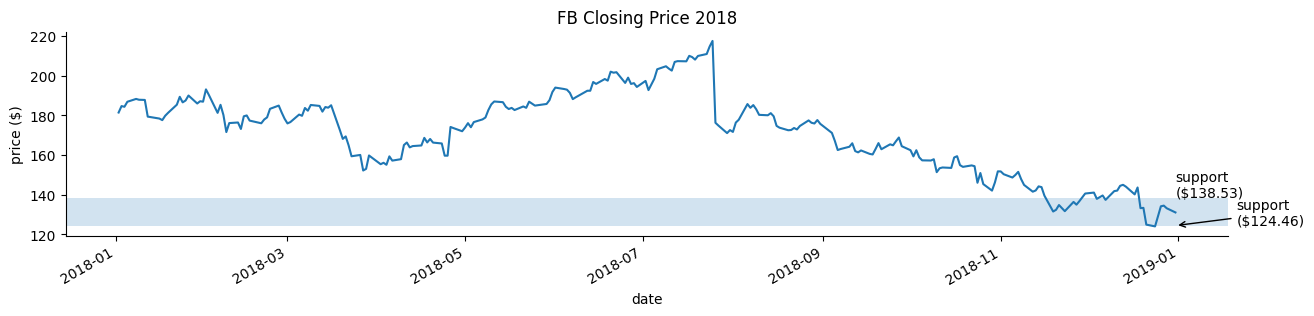

In [19]:
ax = fb['close'].plot(title="FB Closing Price 2018", figsize=(15, 3))
ax.set_ylabel("price ($)")
ax.axhspan(support, resistance, alpha=.2)

plt.annotate(
    f'support\n(${support:.2f})',
    xy=("2018-12-31", support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    f'support\n(${resistance:.2f})',
    xy=("2018-12-31", resistance),
)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

Text(0, 0.5, 'price ($)')

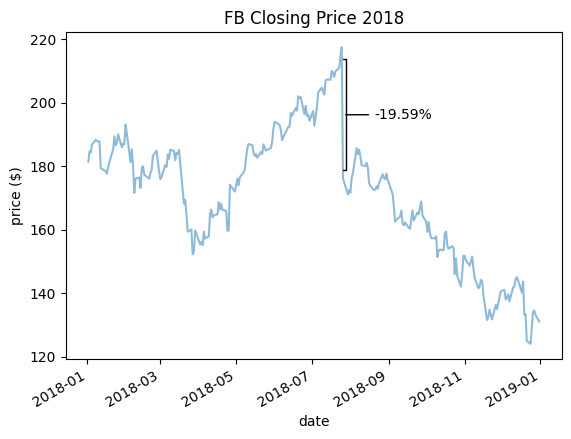

In [20]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title="FB Closing Price 2018", alpha=.5)
plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-26', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=.2')
)
plt.ylabel('price ($)')

#### Colors

Text(0, 0.5, 'price ($)')

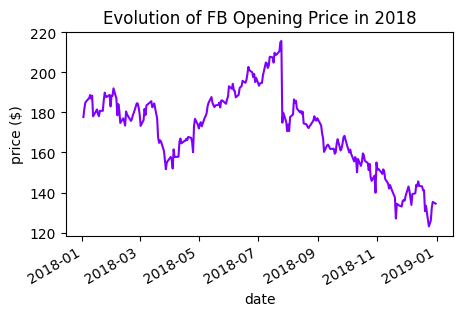

In [21]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#8000FF',
    legend=False,
    title='Evolution of FB Opening Price in 2018'
    )
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

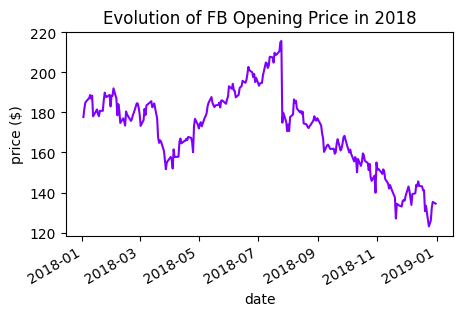

In [22]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color=(128 / 255, 0, 1),
    legend=False,
    title='Evolution of FB Opening Price in 2018'
    )
plt.ylabel('price ($)')

In [23]:
from matplotlib import _cm

_cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0, 0.5, 'Price ($)')

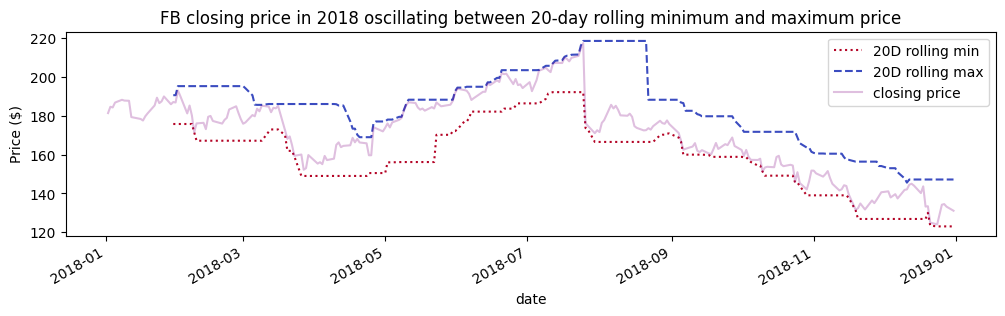

In [24]:
ax = fb.assign(
    rolling_min=lambda x: x["low"].rolling(20).min(),
    rolling_max=lambda x: x["high"].rolling(20).max()
).plot(
    y=['rolling_min', 'rolling_max'],
    colormap='coolwarm_r',
    label=['20D rolling min', '20D rolling max'],
    style=[':', "--"],
    figsize=(12, 3),
    title="FB closing price in 2018 oscillating between 20-day rolling minimum and maximum price"
)

ax.plot(fb['close'], 'purple', alpha=.25, label='closing price')
plt.legend()
plt.ylabel("Price ($)")

In [25]:
from matplotlib import colormaps

colormaps['ocean'](.5)

(np.float64(0.0),
 np.float64(0.2529411764705882),
 np.float64(0.5019607843137255),
 np.float64(1.0))

In [26]:
import color_utils

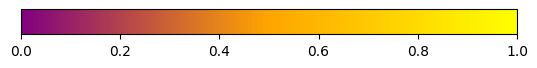

In [27]:
my_colors = ['#800080', "#FFA500", "#FFFF00"]

rgbs = color_utils.hex_to_rgb_color_list(my_colors)
my_cmap = color_utils.blended_map(rgbs)
color_utils.draw_cmap(my_cmap, orientation='horizontal')

In [28]:
import itertools 

colors = itertools.cycle(['#FFFFFF', '#F0F0F0', '#000000'])
colors

In [29]:
next(colors)

'#FFFFFF'

In [30]:
from my_plottling_moudle import master_color_list

def color_generator():
    yield from master_color_list

In [31]:
from matplotlib.colors import ListedColormap

red_black = ListedColormap(['red', 'black'], N=2000)
[red_black(i) for i in range(3)]

[(np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0)),
 (np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0)),
 (np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))]

#### Conditional coloring

In [32]:
def color_generator():
    
    for year in range(1992, 200019):
        if year % 100 == 0 and year % 400 != 0:
            color = '#F0F0F0'
        elif year % 4 == 0:
            color = "#000000"
        else:
            color = "#FFFFFF"
        
        yield color

#### Textures

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

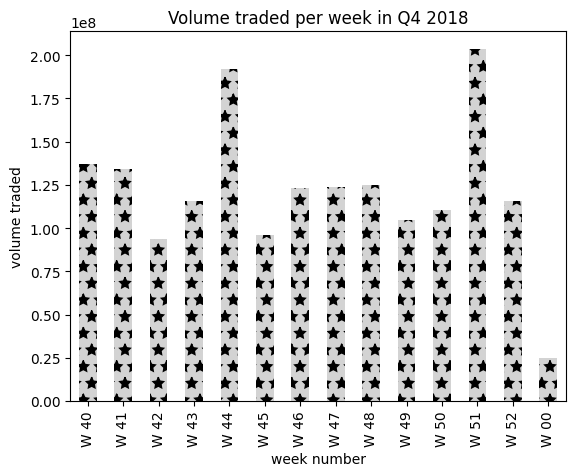

In [37]:
weekly_volume_traded = fb.loc["2018-Q4"].groupby(pd.Grouper(freq='W'))['volume'].sum()

weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')

ax = weekly_volume_traded.plot(
    kind='bar',
    hatch='*', color='lightgray', title="Volume traded per week in Q4 2018"
)
ax.set(xlabel="week number", ylabel='volume traded')

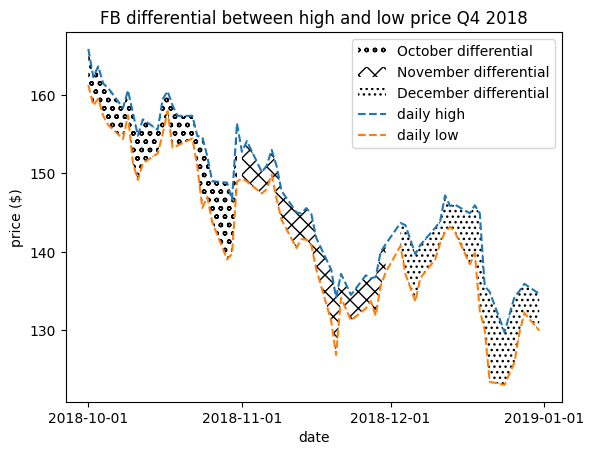

In [42]:
import calendar

fb_q4 = fb.loc["2018-Q4"]

for texture, month in zip(
    ['oo', '/\\/\\', '...'], [10, 11, 12]
):
    plt.fill_between(
        fb_q4.index, fb_q4.high, fb_q4.low,
        hatch=texture, facecolor='white',
        where=fb_q4.index.month == month,
        label=f"{calendar.month_name[month]} differential"
    )
    
plt.plot(fb_q4.index, fb_q4['high'], '--', label='daily high')
plt.plot(fb_q4.index, fb_q4['low'], '--', label='daily low')
plt.xticks([
    '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'
])
plt.xlabel('date')
plt.ylabel("price ($)")
plt.title("FB differential between high and low price Q4 2018")
plt.legend()